### Title: Simple Text Analysis


### 1. Introduction:
In this short project, I demonstrate how to use a very powerful natural language processing tool to perform some quick analytics on a body of text data <br>
<br><strong>Goal: </strong>Perform a simple analysis that helps to discover the most important ideas in text document
<br>
We'll achieve that through a number of techniques including the following:
* do a frequncy count of words in the doc
* Identify keywords in the text based
* extract multi-word phrases in the text document
* turn the text into a simple graphic that highlits the most import words or phrases




In [34]:
#imports

# *** NLP tools
import spacy 
import textacy

# *** text resources
from sklearn.feature_extraction import stop_words

# *** Visualization tools
import matplotlib.pyplot as plt
import matplotlib.style as style

# *** Misc tools
from collections import Counter
import string 
import pandas as pd

### 2 Get data
<strong> Data Description:</strong>
* The data used in this project comes from the WHO website and is a news release regarding the progress on war against ebola
* source: https://www.who.int/news-room/detail/18-06-2019-1-in-3-people-globally-do-not-have-access-to-safe-drinking-water-%E2%80%93-unicef-who

In [47]:
# load data
with open('WHO_water.txt','r') as inf:
    raw_text = inf.readlines()
    
    
# preview what's in the first few lines of the file

raw_text[:5] 

['## source: https://www.who.int/news-room/detail/18-06-2019-1-in-3-people-globally-do-not-have-access-to-safe-drinking-water-%E2%80%93-unicef-who\n',
 '## title: 1 in 3 people globally do not have access to safe drinking water – UNICEF, WHO\n',
 '\n',
 'New report on inequalities in access to water, sanitation and hygiene also reveals more than half of the world does not have access to safe sanitation services.\n',
 '\n']

### 2. Preprocessing
* <strong>Goal:</strong> Prepare the data for subsequent analysis. We remove any bits of data that isn't helpful for our goals.

In [29]:
punctuations = [p for p in string.punctuation]
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [48]:
raw_text =raw_text[3:]                        # remove the first two lines: source url and title respectively
raw_text = ''.join(raw_text).replace('\n','')  # replace '\n' 

# remove punctuations
cleaned_text = [word for word in raw_text.split(' ') if word not in punctuations]

### 3. Text statistics

In [150]:
# Q1: What are the most common words?

In [49]:
counts = Counter(cleaned_text)
counts.most_common(10)

[('and', 41),
 ('the', 33),
 ('of', 27),
 ('to', 25),
 ('in', 22),
 ('sanitation', 13),
 ('access', 11),
 ('people', 11),
 ('water', 11),
 ('have', 10)]

### Notes:
It appears the most common words do not carry much meaning (mostly English stopwords), so we remove them and then check the most common words again

In [50]:
stopWords = stop_words.ENGLISH_STOP_WORDS
cleaned_text = [word for word in cleaned_text if word not in stopWords]  # remove stopwords

counts = Counter(cleaned_text)
counts.most_common(10)

[('sanitation', 13),
 ('access', 11),
 ('people', 11),
 ('water', 11),
 ('basic', 8),
 ('water,', 7),
 ('billion', 7),
 ('drinking', 6),
 ('report', 5),
 ('services', 5)]

### Now..
it makes sense that our most common words are water, people and access which clearly refelct the topic of the text

In [51]:
# more text statistics:

from textacy.text_stats import TextStats


doc = textacy.make_spacy_doc(raw_text)   # create a doc using textacy interface

ts = TextStats(doc)
ts.basic_counts

{'n_sents': 30,
 'n_words': 915,
 'n_chars': 4853,
 'n_syllables': 1534,
 'n_unique_words': 397,
 'n_long_words': 272,
 'n_monosyllable_words': 532,
 'n_polysyllable_words': 153}

### 3. Analysis & Visualization
We can easily visualize some the analysis we did above using matplotlib. A very effective way to do that is to structure your data in pandas dataframe
* we'll create a simple dataframe and then visualize the data


In [15]:
#plt.style.use('fivethirtyeight')

In [52]:
# Q1

df = pd.DataFrame(counts.most_common(),columns=['word','count'])
df.head()

,word,count
0,sanitation,13
1,access,11
2,people,11
3,water,11
4,basic,8


Text(0, 0.5, 'Word')

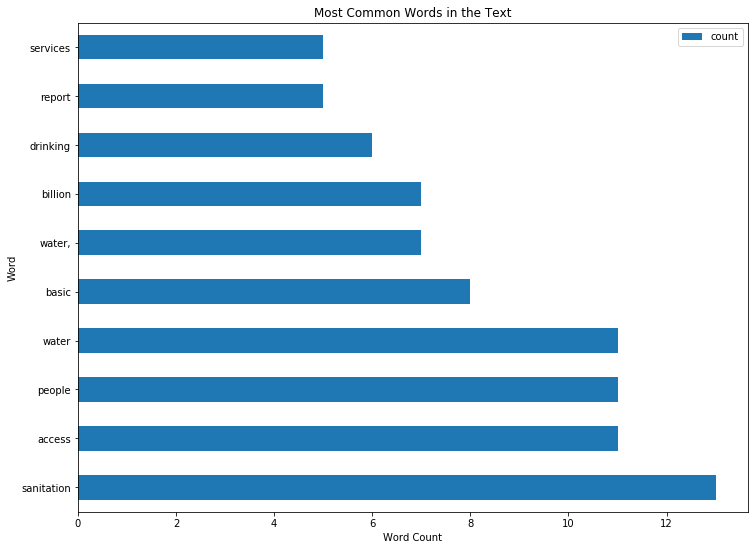

In [53]:
df[:10].plot(kind='barh',x='word',figsize=(12,9))
plt.title('Most Common Words in the Text')
plt.xlabel('Word Count')
plt.ylabel('Word')

In [23]:
# Q2: What are the most common multi-word phrases?
# We use textacy from this point on

In [54]:
# NOTE: we use the previously created doc from the text statistics section

common_phrases = list(textacy.extract.ngrams(doc,n=2,filter_stops=True,filter_punct=True,min_freq=2))
common_phrases = [phrase.text.lower() for phrase in common_phrases]
commonPhrases_counts = Counter(common_phrases)
commonPhrases_counts

Counter({'new report': 2,
         'sanitation services': 4,
         'billion people': 6,
         'safely managed': 3,
         'drinking water': 7,
         'water services': 2,
         '3 billion': 2,
         'lack basic': 4,
         'handwashing facilities': 4,
         'joint monitoring': 2,
         'monitoring programme': 2,
         'universal access': 2,
         'said kelly': 2,
         'kelly ann': 2,
         'ann naylor': 2,
         'gained access': 2,
         '10 people': 2,
         'basic services': 3,
         'rural areas': 2,
         'hepatitis a': 2,
         'basic sanitation': 2,
         'least developed': 2,
         'developed countries': 2,
         'practicing open': 3,
         'open defecation': 5,
         'basic handwashing': 2})

Text(0, 0.5, 'Phrase')

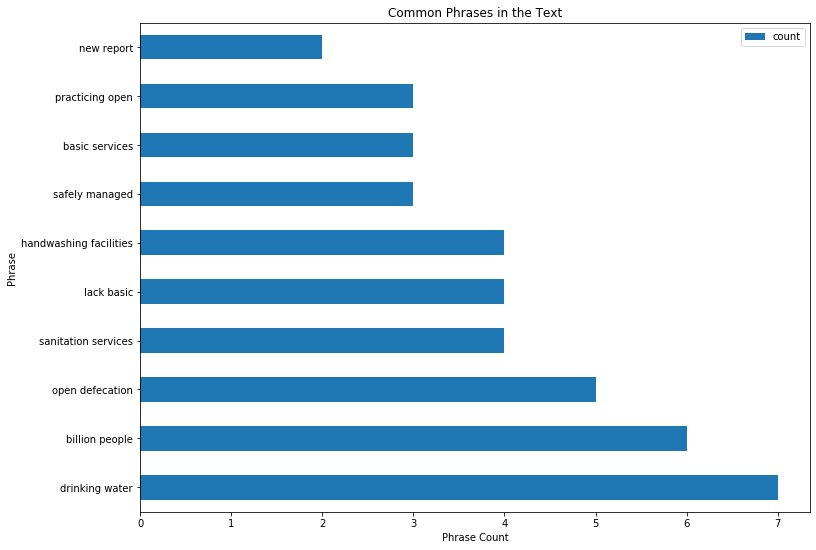

In [55]:
common_phrase_df =pd.DataFrame(commonPhrases_counts.most_common(),columns=['phrase','count'])
common_phrase_df[:10].plot(kind='barh',x='phrase',y='count',figsize=(12,9))
plt.title('Common Phrases in the Text')
plt.xlabel('Phrase Count')
plt.ylabel('Phrase')


In [22]:
# Q3: What are the main references to people, places, and organizations (also called entities)in the text?

In [56]:
entities = [(ent.text,ent.label_) for ent in doc.ents if ent.label_ in ['PERSON','ORG','LOC','GPE','']]
entities

[('UNICEF', 'ORG'),
 ('the World Health Organization', 'ORG'),
 ('The Joint Monitoring Programme', 'ORG'),
 ('Kelly Ann Naylor', 'PERSON'),
 ('Water, Sanitation and Hygiene', 'ORG'),
 ('UNICEF', 'ORG'),
 ('Maria Neira', 'PERSON'),
 ('WHO', 'ORG'),
 ('Department of Public Health, Environmental and Social Determinants of Health',
  'ORG'),
 ('the Least Developed Countries', 'LOC'),
 (' Worse', 'ORG'),
 ('Saharan Africa', 'GPE'),
 ('the Least Developed Countries', 'ORG'),
 ('WASH', 'ORG'),
 ('Kelly Ann Naylor', 'PERSON'),
 ('Angola', 'GPE'),
 ('Benin', 'GPE'),
 ('Burkina Faso', 'ORG'),
 ('Cambodia', 'GPE'),
 ('Chad', 'GPE'),
 ('China', 'GPE'),
 ('Democratic Republic of the Congo', 'GPE'),
 ('Eritrea', 'GPE'),
 ('Ethiopia', 'GPE'),
 ('Ghana', 'GPE'),
 ('India', 'GPE'),
 ('Indonesia', 'GPE'),
 ('Kenya', 'GPE'),
 ('Madagascar', 'GPE'),
 ('Mozambique', 'GPE'),
 ('Nepal', 'GPE'),
 ('Niger', 'GPE'),
 ('Nigeria', 'GPE'),
 ('Pakistan', 'GPE'),
 ('Philippines', 'GPE'),
 ('Sudan', 'GPE'),
 ('South 

### Observe...
that a few of the items extracted as a PERSON was wrong, but then we got it right for most of the remaining text. This is good enough for our purpose, and also we can manually remove the wrong entry

In [57]:
description_map = {'GPE':'Geopolitical Entity eg country',
                   'LOC':'Location,place etc',
                   'ORG':'Organization',
                   'PERSON':'Any person as the word suggests'}
entity_df=pd.DataFrame(entities,columns=['entity','type'])
entity_df['description'] = entity_df['type'].map(description_map)
entity_df.head()

,entity,type,description
0,UNICEF,ORG,Organization
1,the World Health Organization,ORG,Organization
2,The Joint Monitoring Programme,ORG,Organization
3,Kelly Ann Naylor,PERSON,Any person as the word suggests
4,"Water, Sanitation and Hygiene",ORG,Organization


In [26]:
entity_df.groupby(by='type').count()

,entity,description
type,,
GPE,25,25
LOC,1,1
ORG,18,18
PERSON,4,4


### Note:
There's a lot references to places in the text. Which makes a lot of sense since the text is about water crisis in these places

### Conclusion

In this project we we analysed analysed a simple text document to understand what the most important pieces of information in are. We extracted keywords and also names of entities using spacy and textacy. This is just a simple demo of what you can do with nlp.